### Análisis del potencial y campo generado por una distribución de cargar

La solución aproximada de la ecuación de Poisson se puede obtener utilizando la función de Green: 

$$
G( y_{\text{m}}, x) = \frac{1}{2\pi}\ln|y_{\text{m}} - x|,
$$

 donde $y_{\text{m}}$ es el punto donde se evalúa el potencial y $x$ es el punto en el que esta ubicada la fuente. Entonces:

$$
\varphi(x) \approx \rho \sum_e \frac{1}{2\pi}\ln|y_{\text{m}} - x| V_e.
$$


Mientras que el campo gravitacional o eléctrico asociado se calcula como el gradiente negativo del potencial:  

\begin{equation*}
 - \nabla_{y_{\text{m}}} G(y_{\text{m}}, x) = - \frac{1}{2\pi} \frac{y_{\text{m}} - x}{|y_{\text{m}} - x|^2},
\end{equation*}

entonces

$$
\mathbf{E}(y_{\text{m}}, x) \approx - \rho \sum_e \frac{1}{2\pi} \frac{y_{\text{m}} - x}{|y_{\text{m}} - x|^2} V_e. 
$$


En este notebook se analiza el potencial gravitacional o eléctrico generado por una distribución de carga con geometría estrellada, puntual y circular. Para las geometrías estrellada y circular, primero se importa y visualiza la malla generada en el software Gmsh, donde se definen dos grupos físicos representados en color azul y verde.

El potencial y el campo se estiman en los centroides de los triángulos pertenecientes ambos grupos físicos, considerando el efecto de los puntos fuente ubicados en el grupo físico verde. En el caso de la carga puntual, la fuente se ubica en el centroide de la figura.

A continuación, se importan las funciones necesarias para realizar el análisis de estos casos.


In [7]:
%load_ext autoreload
%autoreload 2
#------------------------------------------------
from funciones import read_plot_mesh
from funciones import compute_potential_field
from funciones import plot_potential_field_star
from funciones import plot_potential_field_circle
from funciones import plot_point_source

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



#### Funciones del Notebook

- **`read_plot_mesh`**: Carga y visualiza la malla utilizada en el análisis.  
- **`compute_potential_field`**: Calcula el potencial y el campo generado en la malla propuesta.  
- **`plot_potential_field_star`**, **`plot_potential_field_circle`** y **`plot_point_source`**: Grafícan el potencial y el campo para la geometría estrellada, el círculo y la carga puntual, respectivamente.  


#### Estrella

Se considera una geometría arbitraria en forma de estrella de cinco puntas, con un radio máximo de 1.0 y un radio mínimo de 0.4. El dominio está delimitado por un círculo de radio 5.0. La carga se distribuye de manera uniforme a lo largo de la estrella.  

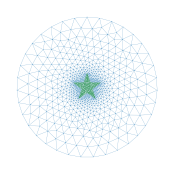

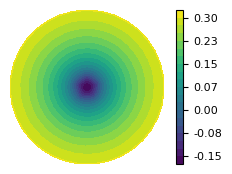

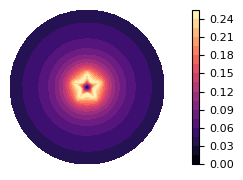

In [8]:
pts, tris_planet,tris = read_plot_mesh('files/star_planet.msh', 'figs/malla_star.pdf')
potential, field = compute_potential_field(pts, tris_planet)
plot_potential_field_star(pts, tris, potential, field)

#### Carga puntual

Se analizó el caso de una carga puntual ubicada en el centroide de la figura. Al igual que en la geometría arbitraria, se consideró un círculo de radio 5 como dominio para la estimación del potencial y del campo.

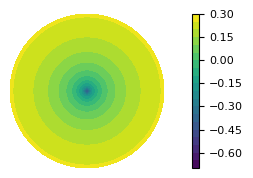

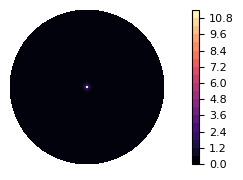

In [9]:
plot_point_source(5, 500)

Se observa que, al compararlo con el caso de una geometría arbitraria, el potencial generado por la distribución de carga tiende al de una carga puntual a grandes distancias. Sin embargo, en las proximidades de la geometría, las variaciones locales en la distribución de carga inducen un potencial y un campo con forma irregular.

#### Carga distribuida circularmente

Finalmente, se analizó una distribución de carga en una geometría circular, donde el radio del círculo interior fue de 1.0 y el del círculo exterior, de 5.0.

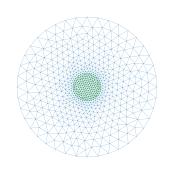

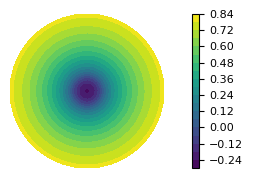

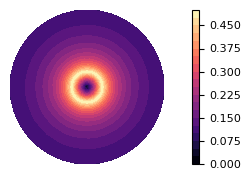

In [10]:
pts, tris_planet,tris = read_plot_mesh('files/circle_planet.msh', 'figs/malla_circle.pdf')
potential, field = compute_potential_field(pts, tris_planet)
plot_potential_field_circle(pts, tris, potential, field)

Se observa que, al igual que en el caso de una carga puntual, el potencial y el campo en un punto exterior presenta simetría en esta distribución. Sin embargo, en las proximidades de la geometría, su magnitud varía debido al aumento en la cantidad de puntos fuente.

#### Comentarios finales sobre la implementación

- Se añadió la funcionalidad **JIT** de **Numba** a la función utilizada para el cálculo del potencial y el campo, tomada de las notas de clase.  

- El código implementado en **Gmsh** permite generar la malla para una geometría estrellada con cinco puntas. Como posible mejora, se sugiere automatizar el código para permitir la variación del número de puntas, explorando el uso iterativo de la función `Line Loop`.  

